In [8]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
#import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import colormaps as cmaps


%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


In [4]:
snow_depth =  xr.open_dataset('../data/SnowDepth_snd/snd_global_CCSM4_rcp45_1.nc', decode_times=False)
#df = snow_depth.to_dataframe()

In [5]:
snow_depth = snow_depth.where(snow_depth.lat > 70)

In [6]:
snow_depth["lon"] = snow_depth.lon - 180

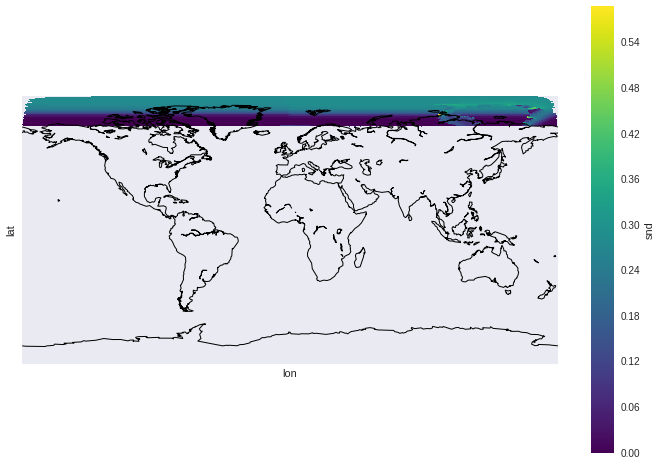

In [9]:
map = Basemap()

map.drawcoastlines()

#snow_depth["snd"].plot()
snow_depth.mean(dim=["time", "bnds"], skipna=True)["snd"].plot(x="lon", y="lat")
plt.show()

(array([  4.40223900e+06,   1.89951600e+06,   9.83570000e+05,
          1.98241000e+05,   2.67860000e+04,   5.40200000e+03,
          1.85600000e+03,   5.18000000e+02,   1.51000000e+02,
          2.10000000e+01]),
 array([ 0.        ,  0.16785295,  0.3357059 ,  0.50355885,  0.6714118 ,
         0.83926475,  1.0071177 ,  1.17497065,  1.3428236 ,  1.51067655,
         1.6785295 ]),
 <a list of 10 Patch objects>)

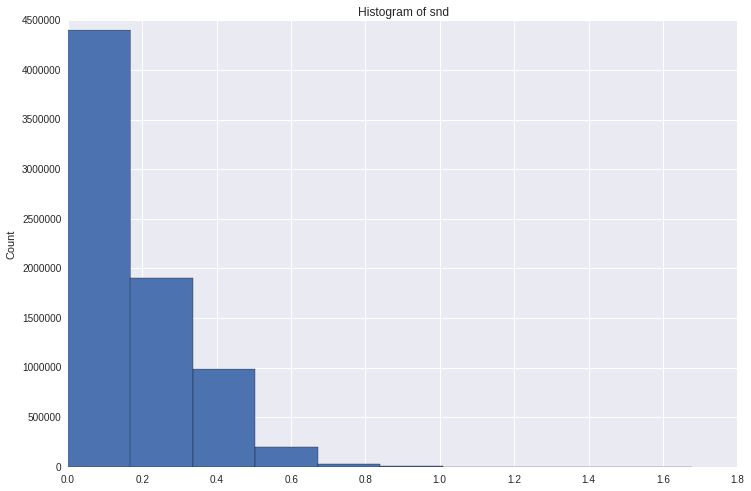

In [10]:
snow_depth["snd"].plot.hist()

In [11]:
mean_snow_depth = snow_depth.mean(dim=["time", "bnds"], skipna=True)["snd"]

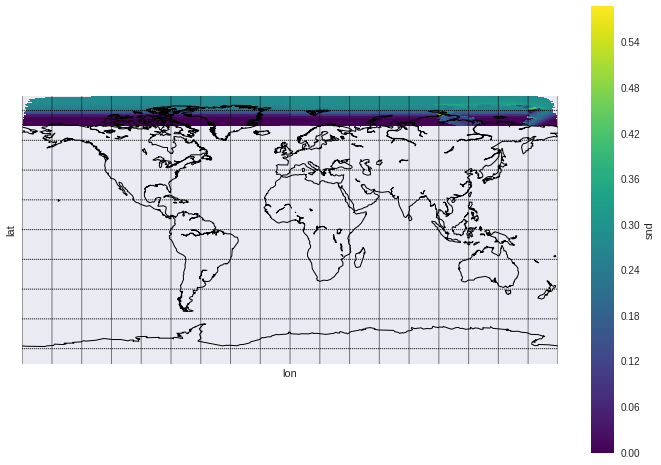

In [13]:
map = Basemap()
map.drawparallels(np.arange(-80.,81.,20.))
map.drawmeridians(np.arange(-180.,181.,20.))

mean_snow_depth.plot(x="lon", y="lat")

map.drawcoastlines()

plt.show()

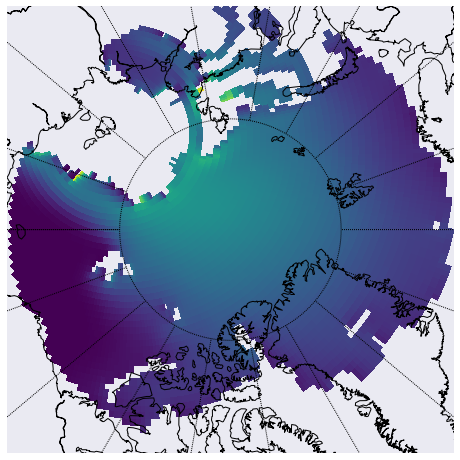

In [14]:
ax = matplotlib.pyplot.gca() 
map = Basemap(projection='npstere',boundinglat=70,lon_0=270,resolution='l')

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(mean_snow_depth.lon.values, mean_snow_depth.lat.values)
map.pcolormesh(x, y, mean_snow_depth.to_masked_array(), cmap=cmaps.viridis)

plt.show()

In [15]:
var_snow_depth = snow_depth.var(dim=["time", "bnds"], skipna=True)["snd"]

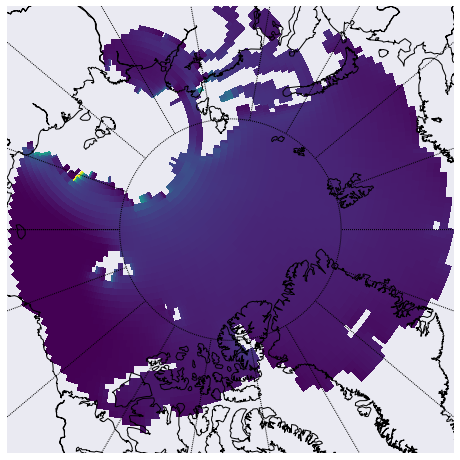

In [16]:
ax = matplotlib.pyplot.gca() 
map = Basemap(projection='npstere',boundinglat=70,lon_0=270,resolution='l')

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(var_snow_depth.lon.values,var_snow_depth.lat.values)
map.pcolormesh(x, y, var_snow_depth.to_masked_array(), cmap=cmaps.viridis)

plt.show()

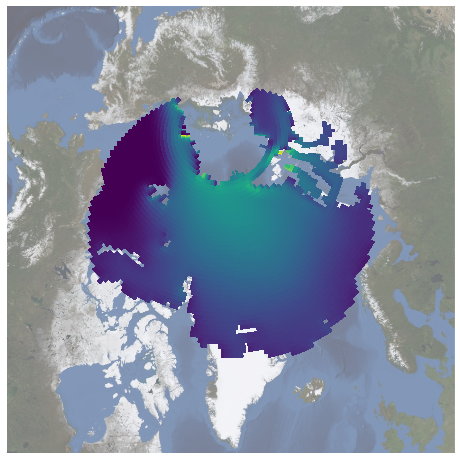

In [17]:
lat_ts=90.0
lat_0=90.0
lon_0=-45.0
sgn=1
width=7000000.
height=7000000.0
map = Basemap(width=width,height=height,resolution='h',\
            projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
map.bluemarble(alpha=0.5) 

x, y = map(mean_snow_depth.lon.values, mean_snow_depth.lat.values)
map.pcolormesh(x, y, mean_snow_depth.to_masked_array(), cmap=cmaps.viridis)
plt.show()

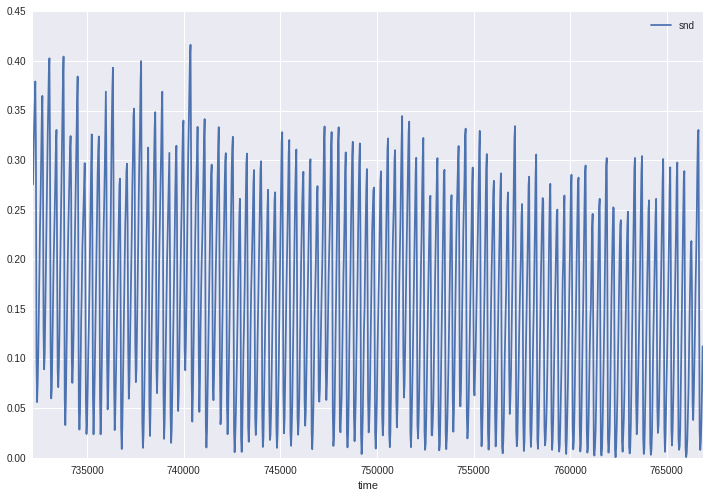

In [22]:
snow_depth.mean(dim=["i", "j", "vertices", "bnds"])["snd"].to_dataframe().plot()

In [21]:
snow_depth.dims

Frozen(SortedKeysDict({u'i': 320, u'j': 384, u'vertices': 4, u'bnds': 2, u'time': 1140}))